In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

axes = [3, 3, 3]
path = [3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3]

# Print a visual representation of the path
def visualize_path(path):
    # Store the current cursor position
    cursor = (0, 0)
    # Store the current direction
    vertical = False
    page = False
    print('X', end='')
    # Iterate over the path and print path to console as X's first horizontally, then vertically
    for i in path:
        i -= 1
        if vertical:
            for j in range(i):      
                print('')
                print(' ' * cursor[1] + 'X', end='')
                cursor = (cursor[0] + 1, cursor[1])
        else:
            print('X' * i, end='')
            cursor = (cursor[0], cursor[1] + i)
        vertical = not vertical
            

print("The chain:")
visualize_path(path)

The chain:
XXX
  XX
   XX
    XXX
      XXX
        XX
         XX
          X
          XX
           X
           XX
            XX
             X
             X

In [79]:
cube = np.zeros((3,3,3))
cube.shape

def draw_cube(cube):
    alpha = 0.6
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Voxels is used to customizations of
    # the sizes, positions and colors.
    # Control colour
    colors = np.empty(axes + [4], dtype=np.float32)
    colors[0] = [1, 1, 0, alpha]  # red
    colors[1] = [0, 1, 1, alpha]  # green
    colors[2] = [0, 0, 1, alpha]  # blue
    ax.voxels(cube, facecolors=colors, edgecolors='grey')

Starting position:(0, 0, 0)
Found solution!

Depth: 20
[[[ 1. 10.  9.]
  [12. 11. 15.]
  [13. 14. 14.]]

 [[ 1. 20.  9.]
  [ 3. 20. 16.]
  [ 4. 19. 18.]]

 [[ 1.  7.  8.]
  [ 2.  7. 16.]
  [ 5.  6. 17.]]]

Depth: 19
[[[ 1. 10.  9.]
  [12. 11. 15.]
  [13. 14. 14.]]

 [[ 1.  0.  9.]
  [ 3.  0. 16.]
  [ 4. 19. 18.]]

 [[ 1.  7.  8.]
  [ 2.  7. 16.]
  [ 5.  6. 17.]]]

Depth: 18
[[[ 1. 10.  9.]
  [12. 11. 15.]
  [13. 14. 14.]]

 [[ 1.  0.  9.]
  [ 3.  0. 16.]
  [ 4.  0. 18.]]

 [[ 1.  7.  8.]
  [ 2.  7. 16.]
  [ 5.  6. 17.]]]

Depth: 17
[[[ 1. 10.  9.]
  [12. 11. 15.]
  [13. 14. 14.]]

 [[ 1.  0.  9.]
  [ 3.  0. 16.]
  [ 4.  0.  0.]]

 [[ 1.  7.  8.]
  [ 2.  7. 16.]
  [ 5.  6. 17.]]]

Depth: 16
[[[ 1. 10.  9.]
  [12. 11. 15.]
  [13. 14. 14.]]

 [[ 1.  0.  9.]
  [ 3.  0. 16.]
  [ 4.  0.  0.]]

 [[ 1.  7.  8.]
  [ 2.  7. 16.]
  [ 5.  6.  0.]]]

Depth: 15
[[[ 1. 10.  9.]
  [12. 11. 15.]
  [13. 14. 14.]]

 [[ 1.  0.  9.]
  [ 3.  0.  0.]
  [ 4.  0.  0.]]

 [[ 1.  7.  8.]
  [ 2.  7.  0.]
  [ 5.  

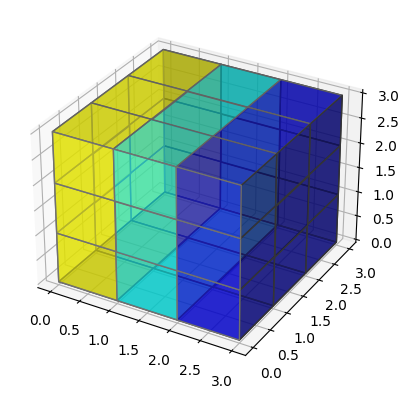

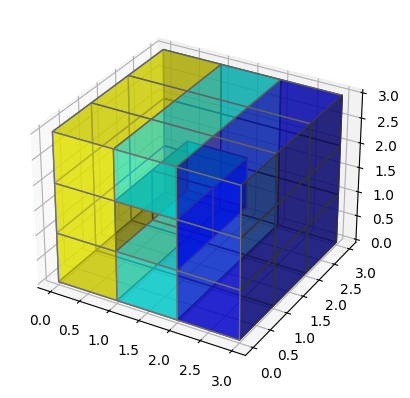

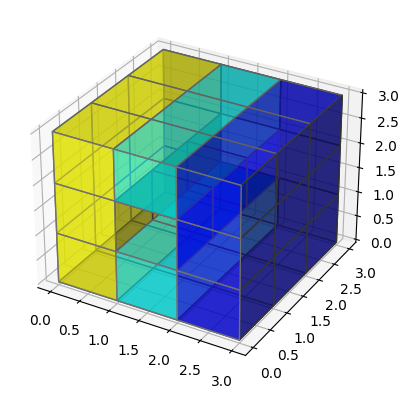

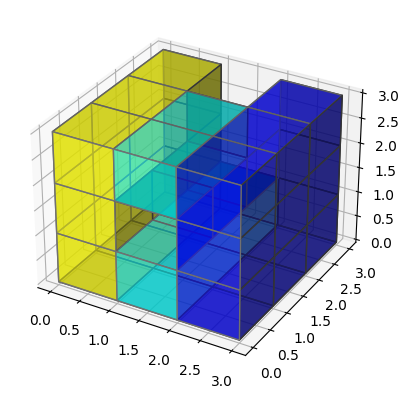

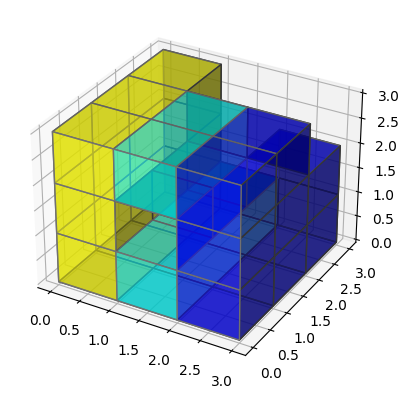

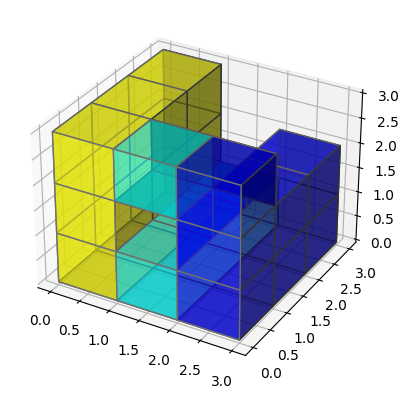

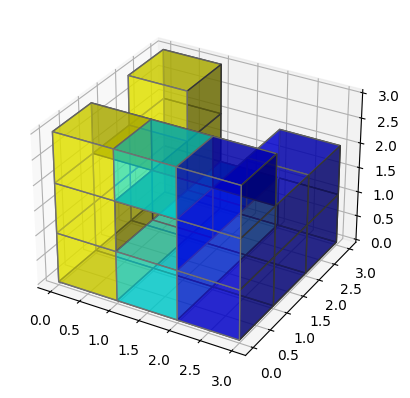

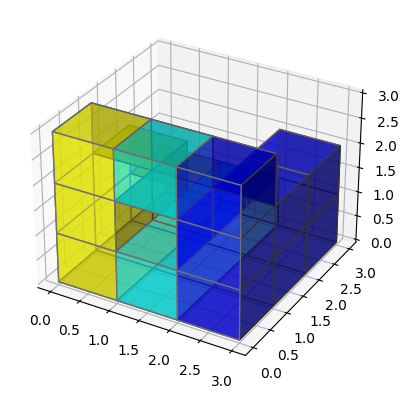

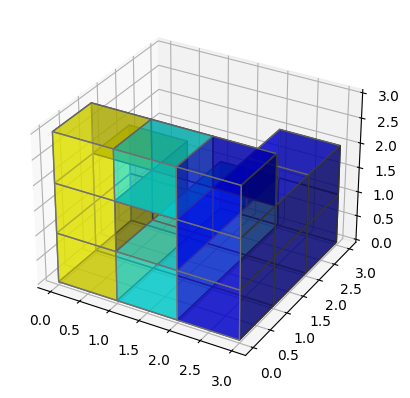

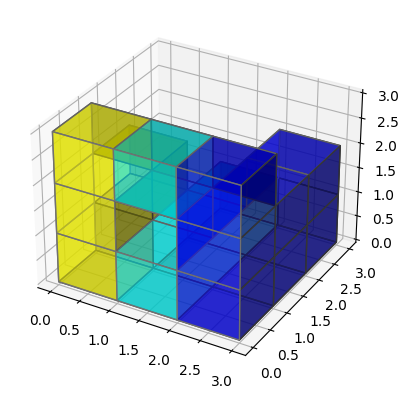

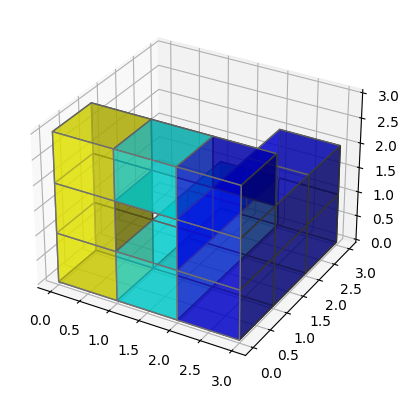

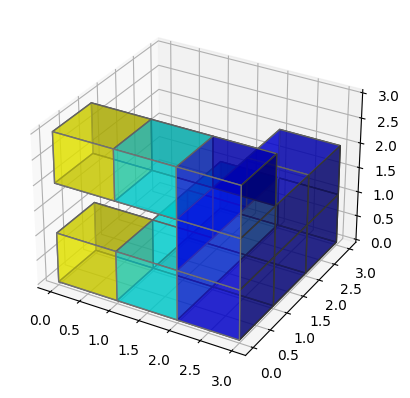

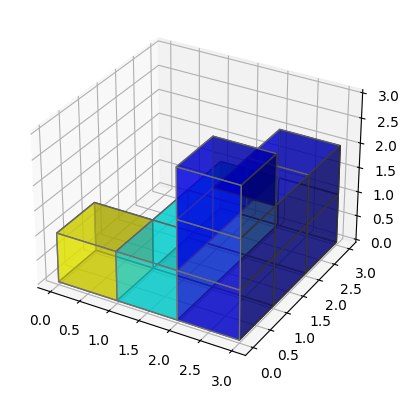

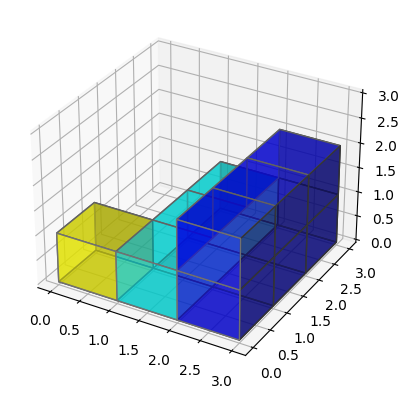

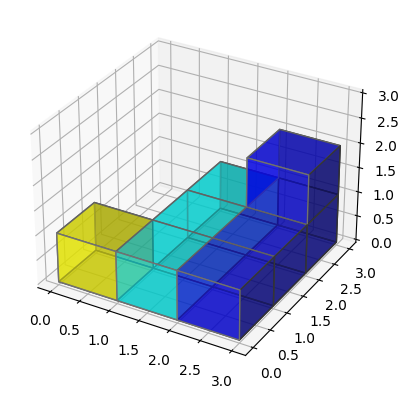

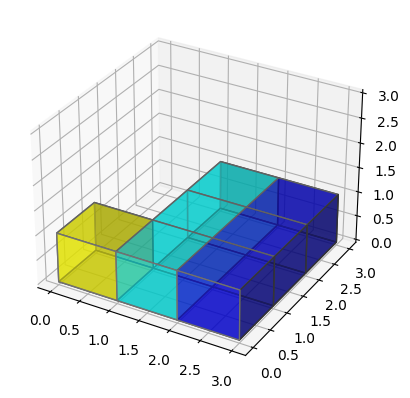

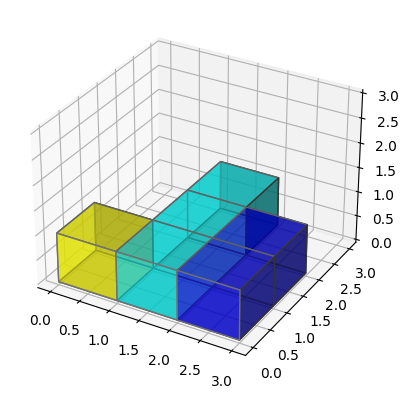

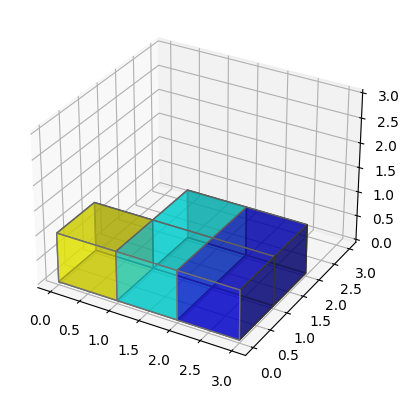

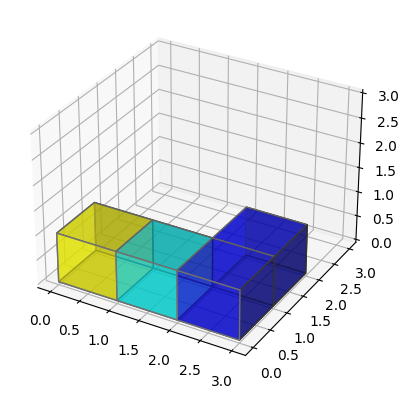

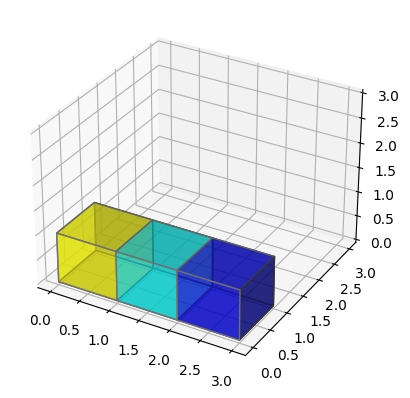

In [80]:
def start_positions(cube):
    for x in range(cube.shape[0]):
        for y in range(cube.shape[1]):
            for z in range(cube.shape[2]):
                yield (x, y, z)

def can_place(cube, position):
    return (position[0] < cube.shape[0] and
            position[1] < cube.shape[1] and
            position[2] < cube.shape[2] and
            position[0] >= 0 and
            position[1] >= 0 and
            position[2] >= 0 and
            cube[position] == 0)

def all_vectors():
    yield (-1,  0,  0)
    yield ( 1,  0,  0)
    yield ( 0, -1,  0)
    yield ( 0,  1,  0)
    yield ( 0,  0, -1)
    yield ( 0,  0,  1)

def place_positions(cube, position, ban_direction, length, depth):
    for vector in (v for v in all_vectors() if v != ban_direction):
        solution = cube.copy()
        next_pos = None
        for i in range(length-1):
            next_pos = tuple(np.asarray(position) + np.asarray(vector) * (i + 1)) 
            if not can_place(solution, next_pos):
                solution = None
                break
            solution[next_pos] = depth
        if solution is not None:
            yield (solution, next_pos, vector)
                
def step_solutions(cube, position, last_dir, path, depth=1):
    if (len(path) == 0):
        assert(np.all(cube))
        print("Found solution!")
        return cube

    global step_count
    step_count += 1
    for solution, next_position, direction in place_positions(cube, position, last_dir, path[0], depth):
        if step_solutions(solution, next_position, direction, path[1:], depth+1) is not None:
            print()
            print("Depth: " + str(depth))
            print(str(solution))
            draw_cube(solution)
            return solution
    return None

def solve(path):
    cube = np.zeros((3,3,3))
    steps = [cube]
    for position in start_positions(cube):
        start = cube.copy()
        start[(position)] = 1
        print ("Starting position:" + str(position))
        solution = step_solutions(start, position, None, path)
        if solution is not None:
            print("Step count: " + str(step_count))
            break

step_count = 0
solve(path)